# Predicting Titanic Survival with CNN

The goal of a project predicting Titanic survival with a CNN (Convolutional Neural Network) could be to develop a machine learning model that can accurately classify passengers as survivors or non-survivors based on their characteristics and features. The project may involve using the CNN architecture, which is well-suited for analyzing visual data like images, to extract meaningful patterns and features from the available data.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
dataframe = pd.read_csv('SVMtrain.csv')

# Exploring Dataset

Exploring a dataset involves analyzing and understanding its structure, content, and characteristics. It helps in gaining insights into the data, identifying patterns, and making informed decisions about data preprocessing, feature engineering, and modeling.

In [4]:
dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [5]:
dataframe.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
884,887,0,2,Male,27.0,0,0,13.00,3
885,888,1,1,female,19.0,0,0,30.00,3
886,889,0,3,female,60.0,1,2,23.45,3
887,890,1,1,Male,26.0,0,0,30.00,1
888,891,0,3,Male,32.0,0,0,7.75,2


In [6]:
dataframe['Sex'] = dataframe['Sex'].map({'female':0, 'Male':1})

In [7]:
dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


In [8]:
dataframe['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [9]:
dataframe.shape

(889, 9)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [11]:
dataframe.isna().sum().any()

False

In [12]:
dataframe.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'Survived'}>

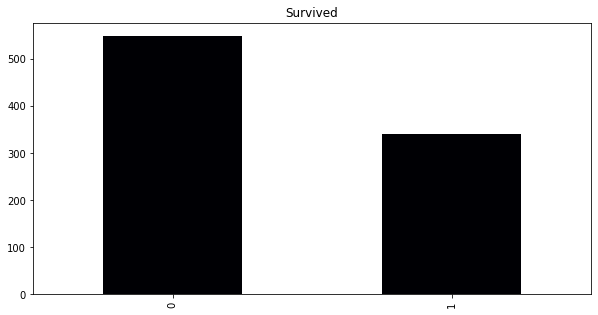

In [13]:
dataframe['Survived'].value_counts().plot(kind = 'bar',
                                         figsize = (10, 5), 
                                         title = 'Survived', 
                                         rot = 90, 
                                         cmap = 'magma')

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [14]:
dataframe.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,0.477538,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,1.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [15]:
corr_matrix = dataframe.corr()

In [16]:
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.008341,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.116558,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.122449,0.081656,0.016824,-0.548193,0.164681
Sex,0.043136,-0.541585,0.127741,1.000000,0.102014,-0.116348,-0.247508,-0.179958,0.110320
Age,0.008341,-0.116558,-0.122449,0.102014,1.000000,-0.156777,-0.215191,-0.003307,-0.124894
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.156777,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.215191,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,-0.179958,-0.003307,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,0.110320,-0.124894,0.068900,0.040449,-0.226311,1.000000


<AxesSubplot:>

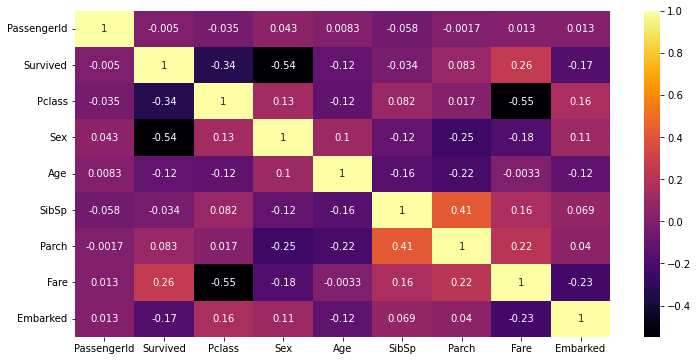

In [40]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix,
            annot = True, 
            cmap = 'inferno')

In [19]:
dataset = dataframe.drop('Survived', axis = 1)

In [20]:
dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,3
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,3
3,4,1,0,35.0,1,0,53.1000,3
4,5,3,1,35.0,0,0,8.0500,3


# Correlation Diagram

A correlation diagram, also known as a correlation matrix or correlation heatmap, is a graphical representation that displays the correlation coefficients between variables in a dataset. It provides a visual summary of the relationships between pairs of variables, allowing you to quickly identify patterns and dependencies.

<AxesSubplot:title={'center':'Correlation with Survived'}>

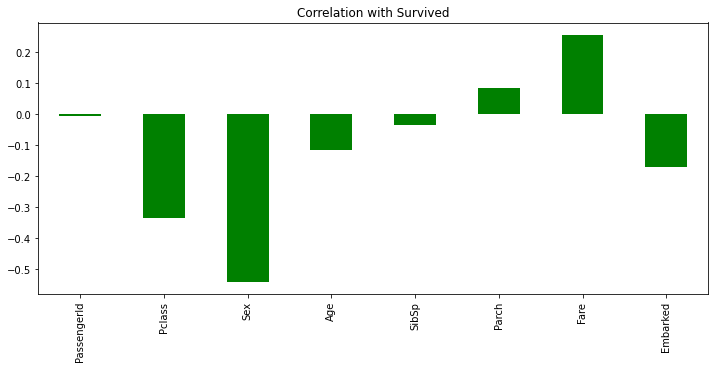

In [21]:
dataset.corrwith(dataframe['Survived']).plot.bar(
    figsize = (12, 5), 
    title = 'Correlation with Survived', 
    cmap = 'ocean', 
    rot =90
)

In [22]:
dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


In [23]:
dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [24]:
x = dataframe.drop('Survived', axis = 1)
y = dataframe['Survived']

In [25]:
x.shape, y.shape

((889, 8), (889,))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 8), (178, 8), (711,), (178,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
x_train

array([[-0.54928632, -1.5915643 , -1.33724915, ..., -0.46771929,
         1.54520403, -1.96478908],
       [-0.85533572,  0.8212336 , -1.33724915, ...,  0.76852018,
        -0.12603058,  0.58209339],
       [-1.43212112,  0.8212336 , -1.33724915, ..., -0.46771929,
        -0.48015886, -0.69134784],
       ...,
       [-0.4276513 ,  0.8212336 ,  0.7478038 , ..., -0.46771929,
        -0.47490078,  0.58209339],
       [ 0.3021588 ,  0.8212336 ,  0.7478038 , ..., -0.46771929,
        -0.49134205, -1.96478908],
       [ 1.64014399, -0.38516535, -1.33724915, ..., -0.46771929,
        -0.37574839,  0.58209339]])

In [33]:
x_test

array([[ 0.25115057,  0.8212336 ,  0.7478038 , ..., -0.46771929,
        -0.47490078,  0.58209339],
       [ 0.65136901,  0.8212336 ,  0.7478038 , ..., -0.46771929,
        -0.48091002, -0.69134784],
       [ 0.65921643, -0.38516535, -1.33724915, ...,  2.00475965,
         0.66585251,  0.58209339],
       ...,
       [ 1.21245957,  0.8212336 ,  0.7478038 , ..., -0.46771929,
        -0.47999261,  0.58209339],
       [-1.02013155, -1.5915643 ,  0.7478038 , ..., -0.46771929,
        -0.10433123,  0.58209339],
       [-1.04759752,  0.8212336 , -1.33724915, ...,  2.00475965,
         0.75699259,  0.58209339]])

In [34]:
x_train.shape, x_test.shape

((711, 8), (178, 8))

# Reshaping

Reshaping a tensor involves rearranging its elements into a new shape without changing their values. The reshaping operation can be applied to tensors of different dimensions, such as converting a 1D tensor into a 2D tensor or vice versa. Reshaping is commonly performed using the reshape() function or method available in most deep learning frameworks.

In [35]:
x_train = x_train.reshape(711, 8, 1)
x_test = x_test.reshape(178, 8, 1)

In [36]:
x_train.shape, x_test.shape

((711, 8, 1), (178, 8, 1))

# Building Model

Building a CNN (Convolutional Neural Network) model involves constructing a deep learning architecture specifically designed for image processing and analysis. CNNs are highly effective in capturing spatial patterns and features from images, making them a popular choice for tasks like image classification, object detection, and image segmentation.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [44]:
model = Sequential()
model.add(Conv1D(32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (8, 1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.))

model.add(Conv1D(64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 32)             96        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 4, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 64)             4160      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 64)           

Early stopping is a technique used during the training of machine learning models to prevent overfitting and find the optimal point at which to stop training. It involves monitoring the performance of the model on a validation dataset and stopping the training process when the model's performance on the validation dataset starts to degrade.

In [46]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           patience = 3, 
                           restore_best_weights = True)

# Compiling Model

Compiling a model in the context of deep learning refers to configuring its training process. It involves specifying the optimizer, the loss function, and any additional metrics that will be used during the training phase. Compiling a model is an essential step before training it on a dataset

In [47]:
model.compile(optimizer = Adam(0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training Model

Training a model in the context of deep learning involves the process of fitting the model to a training dataset, allowing it to learn from the data and adjust its internal parameters (weights and biases) to make accurate predictions.

In [48]:
model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), 
          epochs = 250, 
          callbacks = [early_stop])

Epoch 1/250
23/23 [==============================] - 7s 62ms/step - loss: 0.8066 - accuracy: 0.6146 - val_loss: 0.6697 - val_accuracy: 0.6966
Epoch 2/250
23/23 [==============================] - 0s 15ms/step - loss: 0.7530 - accuracy: 0.6582 - val_loss: 0.6587 - val_accuracy: 0.7022
Epoch 3/250
23/23 [==============================] - 0s 15ms/step - loss: 0.7093 - accuracy: 0.6428 - val_loss: 0.6432 - val_accuracy: 0.7135
Epoch 4/250
23/23 [==============================] - 0s 14ms/step - loss: 0.6975 - accuracy: 0.6835 - val_loss: 0.6279 - val_accuracy: 0.7135
Epoch 5/250
23/23 [==============================] - 0s 15ms/step - loss: 0.6927 - accuracy: 0.6779 - val_loss: 0.6120 - val_accuracy: 0.7360
Epoch 6/250
23/23 [==============================] - 0s 19ms/step - loss: 0.6622 - accuracy: 0.7046 - val_loss: 0.5941 - val_accuracy: 0.7360
Epoch 7/250
23/23 [==============================] - 0s 13ms/step - loss: 0.6596 - accuracy: 0.7032 - val_loss: 0.5750 - val_accuracy: 0.7416
Epoch 

In [49]:
model.save('survival_pred_model.h5')

# Learning Curve

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [50]:
losses = pd.DataFrame(model.history.history)

In [51]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.806579,0.614627,0.669729,0.696629
1,0.752963,0.658228,0.658720,0.702247
2,0.709312,0.642757,0.643167,0.713483
3,0.697517,0.683544,0.627912,0.713483
4,0.692701,0.677918,0.611974,0.735955


<AxesSubplot:>

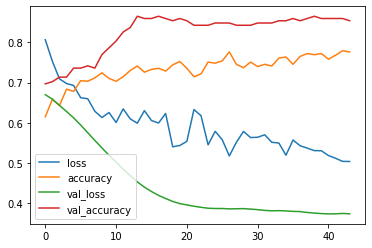

In [52]:
losses.plot()

# Accuracy Curve

An accuracy curve is a graphical representation that depicts how the accuracy of a machine learning model changes as a specific aspect of the model or training process varies. The accuracy curve is typically plotted against the varying parameter or condition to analyze its impact on the model's accuracy.

<AxesSubplot:>

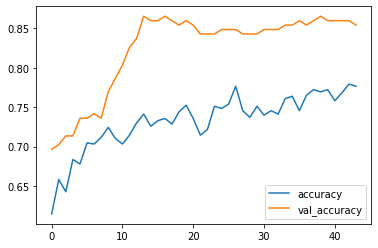

In [53]:
losses[['accuracy', 'val_accuracy']].plot()

# Loss Curve

A loss curve is a graphical representation that shows how the loss of a machine learning model changes over the course of training. Loss refers to the discrepancy between the predicted output of the model and the true or expected output. The loss curve helps in monitoring the progress of model training and assessing the convergence and performance of the model.

<AxesSubplot:>

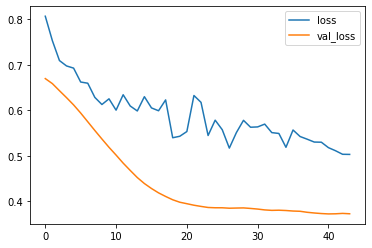

In [54]:
losses[['loss', 'val_loss']].plot()

# Prediction on x-Test Data

In [55]:
y_pred = model.predict(x_test)
predict_class = y_pred.argmax(axis = 1)

6/6 [==============================] - 0s 9ms/step


In [57]:
print(y_test.iloc[5]), print(predict_class[5])

0
0


(None, None)

In [58]:
print(y_test.iloc[4]), print(y_pred[45])

0
[0.0967266]


(None, None)

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement



In [59]:
from sklearn.metrics import confusion_matrix

A confusion matrix, also known as an error matrix, is a table that summarizes the performance of a classification model by comparing predicted class labels with actual class labels. It provides a comprehensive view of the model's predictions and the associated errors. The confusion matrix is typically used in supervised learning tasks, where the true class labels are known.

In [63]:
confusion_matrix = confusion_matrix(y_test, predict_class)

In [64]:
confusion_matrix

array([[107,   0],
       [ 71,   0]], dtype=int64)

<AxesSubplot:>

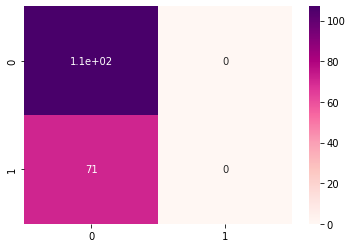

In [65]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'RdPu')

# Thanks !